## Regularization

A model with l2 or ridge regularization and l1 or lasso regularization. 

In both cases, an apparently optimum value of the regularization parameter was found. This process is an example of **model selection**. The goal of model selection is to find the best performing model for the problem at hand. Model selection is a component of model training. However, one must be careful, as applying a poor model selection method can lead to an over-fit model!

The most widely used set of tools for preventing overfitting are known as **regularization methods**. Regularization is not free however. While regularization reduces the **variance** in the model results, it introduces **bias**. Whereas, an overfit model exhibits low bias the variance is high. The high variance leads to unpredictable results when the model is exposed to new data cases. On the other hand, the stronger the regularization of a model the lower the variance, but the greater the bias. This all means that when applying regularization you will need to contend with the **bias-variance trade-off**. 

To better understand this trade-off you can consider the example of the mean square error, which can be decomposed into its components. The mean square error can be written as:

$$\Delta x = E \Big[ \big(Y - \hat{f}(X) \big)^2 \Big] = \frac{1}{N} \sum_{i=1}^N \big(y_i - \hat{f}(x_i) \big)^2 $$

Where,
$Y = $ the label vector.  
$X = $ the feature matrix.   
$\hat{f}(x) = $ the trained model.   

Expanding the representation of the mean square error:

$$\Delta x = \big( E[ \hat{f}(X)] - \hat{f}(X) \big)^2 + E \big[ ( \hat{f}(X) - E[ \hat{f}(X)])^2 \big] + \sigma^2\\
\Delta x = Bias^2 + Variance + Irreducible\ Error$$



In [1]:
import pandas as pd
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline

In [2]:
## Load Dataset

Features = np.array(pd.read_csv('Auto_Data_Features.csv'))
Labels = np.array(pd.read_csv('Auto_Data_Labels.csv'))

print(Features.shape)
print(Labels.shape)

(195, 45)
(195, 1)


The data are available in a pre-processed form. The preprocessing includes the following:
1. Cleaning missing values.
2. Aggregate categories of certain categorical variables. 
3. Encoding categorical variables as binary dummy variables.
4. Standardization of numeric variables. 



MSE:  0.02103483180293403
RMSE: 0.14503389880622403
MAE:  0.11896679673181162
MAE:  0.09769580826159974
R2:   0.9271178345990491


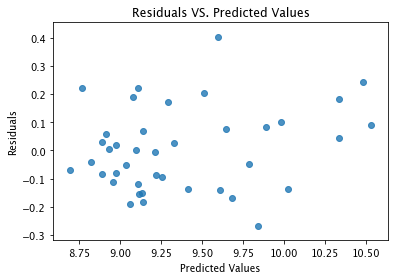

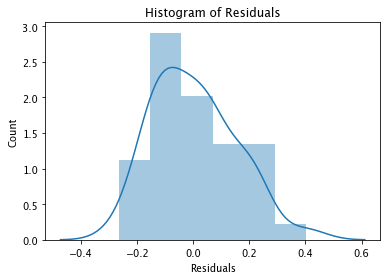

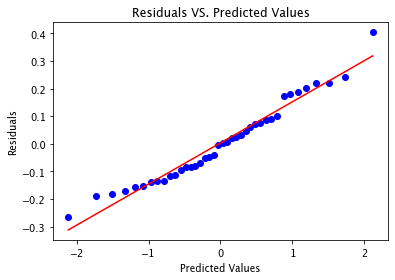

In [9]:
# Split dataset
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size=40)

X_train = Features[indx[0], :]
y_train = np.ravel(Labels[indx[0]])
X_test = np.array(Features[indx[1], :])
y_test = np.ravel(Labels[indx[1]])

## Create a simple Linear Model
lin_mod = linear_model.LinearRegression()
lin_mod.fit(X_train, y_train)

## Evaluate the model
def print_metrics(y_true, y_predicted):
    print('MSE:  ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('RMSE: ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('MAE:  ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('MAE:  ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R2:   ' + str(sklm.r2_score(y_true, y_predicted)))
    
def resid_plot(y_test, y_score):
    # calculate vector of residuals
    resids = np.subtract(y_test.reshape(-1, 1), y_score.reshape(-1, 1))
    # make a residual plot
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals VS. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()
    
def hist_plot(y_test, y_score):
    # calculate vector of residuals
    resids = np.subtract(y_test.reshape(-1, 1), y_score.reshape(-1, 1))
    # make a histogram
    sns.distplot(resids)
    plt.title('Histogram of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Count')
    plt.show()
    
def resid_qq(y_test, y_score):
    # calculate vector of residuals
    resids = np.subtract(y_test, y_score)
    # make a Q-Q Normal plot of the residuals of the model using the test partition.
    ss.probplot(resids.flatten(), plot=plt)
    plt.title('Residuals VS. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()
    
y_score = lin_mod.predict(X_test)
print_metrics(y_test, y_score)
resid_plot(y_test, y_score)
hist_plot(y_test, y_score)
resid_qq(y_test, y_score)


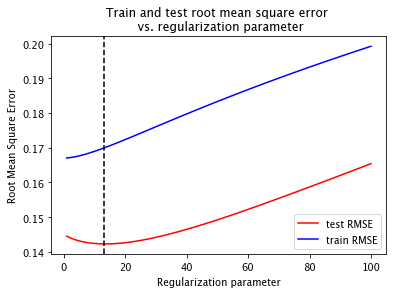

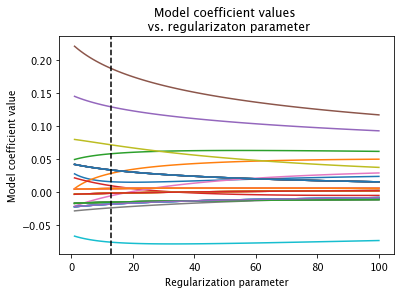

(14, 0.14229997077366102)


In [25]:
## Apply L2 Regularization to constrain the model parameters

def plot_regularization(l2, train_RMSE, test_RMSE, coefs, min_index, title):
    plt.plot(l2, test_RMSE, color='red', label='test RMSE')
    plt.plot(l2, train_RMSE, color='blue', label='train RMSE')
    plt.axvline(min_index, color = 'black', linestyle = '--')
    plt.legend()
    plt.xlabel('Regularization parameter')
    plt.ylabel('Root Mean Square Error')
    plt.title(title)
    plt.show()
    
    plt.plot(l2, coefs)
    plt.axvline(min_index, color = 'black', linestyle = '--')
    plt.title('Model coefficient values \n vs. regularizaton parameter')
    plt.xlabel('Regularization parameter')
    plt.ylabel('Model coefficient value')
    plt.show()
    

def test_l2_regularization(X_train, y_train, X_teset, y_teset, l2):
    train_RMSE = []
    test_RMSE = []
    coefs = []
    for reg in l2:
        lin_mod = linear_model.Ridge(alpha=reg)
        lin_mod.fit(X_train, y_train)
        coefs.append(lin_mod.coef_)
        y_score_train = lin_mod.predict(X_train)
        train_RMSE.append(math.sqrt(sklm.mean_squared_error(y_train, y_score_train)))
        y_score = lin_mod.predict(X_test)
        test_RMSE.append(math.sqrt(sklm.mean_squared_error(y_test, y_score)))
    min_index = np.argmin(test_RMSE)
    min_l2 = l2[min_index]
    min_RMSE = test_RMSE[min_index]
    title = 'Train and test root mean square error \n vs. regularization parameter'
    plot_regularization(l2, train_RMSE, test_RMSE, coefs, min_index, title)
    
    return min_l2, min_RMSE


# Define a set of L2 penalty parameters.
# (You can think of this penalty as constraining the L2 or Euclidean norm of the model weight vector)
l2 = [i for i in range(1, 101)]
out_l2 = test_l2_regularization(X_train, y_train, X_test, y_test, l2)
print(out_l2)

Examine these results.

The top plot shows the training and test RMSE vs the regularization parameter. The point with the minimum RMSE is shown with a dotted line. Notice that there is a minimum where the l2 parameter has a value of 14.0. To the left of the minimum variance dominates bias. To the right of the minimum bias dominates variance. In this case, the changes in RMSE are not dramatic until the bias grows significantly.  

The bottom plot shows the value of the 45 model coefficients vs. the regularization parameter. At the left the regularization penalty is small and the coefficient values show a wide range of values, giving a high variance model. To the right the coefficient values become more tightly clustered, giving a more constrained and higher bias model. 

MSE:  0.02103483180293403
RMSE: 0.14503389880622403
MAE:  0.11896679673181162
MAE:  0.09769580826159974
R2:   0.9271178345990491


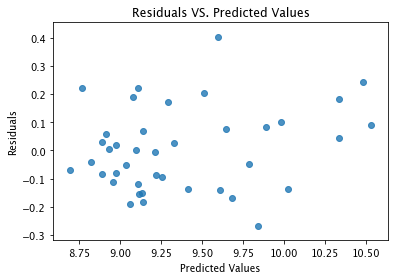

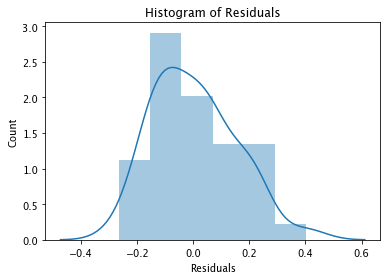

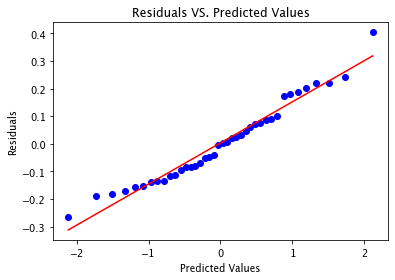

In [27]:
## Create a simple Linear Model with L2 regularization

lin_mod_l2 = linear_model.Ridge(alpha=out_l2[0])
lin_mod.fit(X_train, y_train)
y_score_l2 = lin_mod.predict(X_test)

print_metrics(y_test, y_score_l2)
resid_plot(y_test, y_score_l2)
hist_plot(y_test, y_score_l2)
resid_qq(y_test, y_score_l2)

In [30]:
## Apply l1 regularization

def test_regularization_l1(X_train, y_train, X_test, y_test, l1):
    train_RMSE = []
    test_RMSE = []
    coefs = []
    for reg in l1:
        lin_mod = linear_model.Lasso(alpha=reg)
        lin_mod.fit(X_train, y_train)
        coefs.append(lin_mod.coef_)
        y_score_train = lin_mod.predict(X_train)
        train_RMSE.append(math.sqrt(sklm.mean_squared_error(y_train, y_score_train)))
        y_score = lin_mod.predict(X_test)
        test_RMSE.append(math.sqrt(sklm.mean_squared_error(y_test, y_score)))
    min_index = np.argmin(test_RMSE)
    min_RMSE = test_RMSE[min_index]
    min_l1 = l1[min_index]
    
    title = 'Train and test root mean square error \n vs. regularization parameter'
    plot_regularization(l2, train_RMSE, test_RMSE, coefs, min_index, title)
    
    return min_l1, min_RMSE


l1 = [i/5000 for i in range(1, 101)]
output_l1 = test_regularization_l1(X_train, y_train, X_test, y_test, l1)
print(output_l1)
    

(0.0044, 0.14497613175896168)


As before, the top plot shows the training and test RMSE vs the regularization parameter. The point with the minimum RMSE is shown with a dotted line. Notice that there is a minimum where the l1 parameter has a value of 0.0044. To the left of the minimum variance dominates bias. To the right of the minimum bias dominates variance. Notice that the curve of RMSE has some kinks or sharp bends. This is in contrast to the smooth curve produced by l2 regularization. 

The bottom plot shows the value of the 45 model coefficients vs. the regularization parameter. At the left the regularization penalty is small and the coefficient values show a wide range of values, giving a high variance model. To the right the coefficient values become more tightly clustered, giving a more constrained and higher bias model. In addition, many of the parameters are being driven to zero as the regularization parameter increases. The parameters being driven to zero account for the kinks in the RMSE curve.   

In [ ]:
lin_mod_l1 = linear_model.Lasso(alpha=output_l1[0])
lin_mod_l1.fit(X_train, y_train)
lin_mo